 PROBLEM STATEMENT:The challenge is to develop a machine learning model that can accurately identify fake job postings and distinguish them from legitimate ones. This model would be used to automatically filter out fraudulent job postings, preventing them from reaching job seekers, and reducing the burden on employers to manually vet applications.

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


here, we are mount our Google Drive in Google Colaboratory 

IMPORTING THE LIBRARIES


importing Necessary libraries

In [176]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


1.PANDAS:pandas (imported as pd) is a library for data manipulation and analysis, particularly for working with tabular data (e.g. data stored in spreadsheets or databases).
2.NUMPY:numpy (imported as np) is a library for numerical computing in Python. It provides efficient tools for working with arrays and matrices, as well as various mathematical functions and algorithms.
3.MATPLOTLIB:matplotlib is a library for creating static, interactive, and animated visualizations in Python. It provides tools for creating various types of plots and charts, including line plots, scatter plots, bar plots, histograms, and more.
4.SEABORN:seaborn is a library for statistical data visualization. It provides
a high-level interface for creating aesthetically pleasing and informative visualizations of complex data.

READING THE DATA SET


In [177]:
dataset_train=pd.read_csv('/content/drive/MyDrive/week5/fake_job_postings.csv/fake_job_postings.csv')

In [178]:
dataset_train.shape

(17880, 18)

In [179]:
dataset_train.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [180]:
dataset_train.tail(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [181]:
dataset_train.shape

(17880, 18)

In [182]:
dataset_train.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

job_id: Unique identifier for each job posting
title: Job title
location: Job location
department: Department or team within the company responsible for the job posting
salary_range: Salary range for the job
company_profile: Description of the company and its culture
description: Description of the job duties and requirements
requirements: Required qualifications for the job
benefits: Benefits offered with the job
telecommuting: Whether the job allows telecommuting (0 = no, 1 = yes)
has_company_logo: Whether the company posting the job has a logo (0 = no, 1 = yes)
has_questions: Whether the job posting includes questions for applicants to answer (0 = no, 1 = yes)
employment_type: Type of employment (Full-time, Part-time, Contract, etc.)
required_experience: Level of experience required for the job (Entry level, Mid-Senior level, etc.)
required_education: Education level required for the job (Bachelor's degree, Master's degree, etc.)
industry: Industry in which the company operates (Information Technology, Finance, etc.)
function: Function or role of the job within the company (Engineering, Sales, etc.)
fraudulent: Whether the job posting is fraudulent (0 = no, 1 = yes)

EXPLORATORY DATA ANALYSIS

checking missing data


In [183]:
dataset_train.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<Axes: >

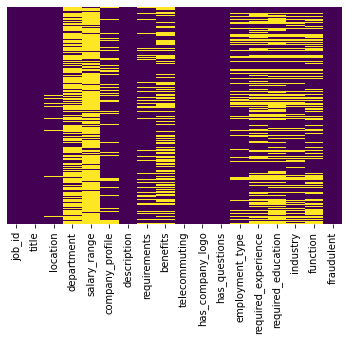

In [184]:
sns.heatmap(dataset_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

dataset_train.isnull()': This returns a dataframe of boolean values where 'True' indicates a null value.

'yticklabels = False': This removes the y-axis tick labels from the heatmap.

'cbar = False': This removes the colorbar from the heatmap.

'cmap = 'viridis'': This sets the color map to 'viridis', which is a popular color map in seaborn.

A heatmap that displays the null values in the 'dataset_train' dataframe using a color scheme where yellow indicates missing values, and blue indicates non-missing values.

In [185]:
dataset_train.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


In [186]:
dataset_train.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

<Axes: xlabel='has_company_logo', ylabel='count'>

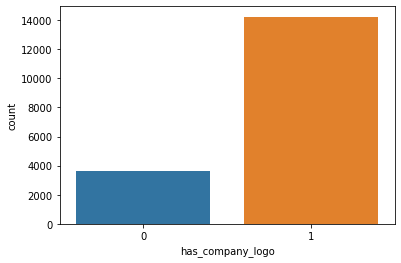

In [187]:
sns.countplot(x='has_company_logo',data=dataset_train)

<Axes: xlabel='telecommuting', ylabel='count'>

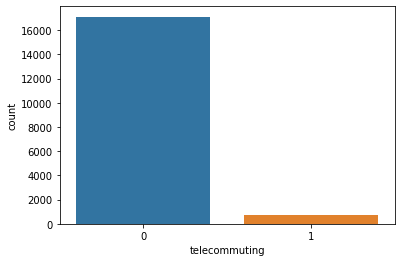

In [188]:
sns.countplot(x='telecommuting',data=dataset_train)

<Axes: xlabel='fraudulent', ylabel='count'>

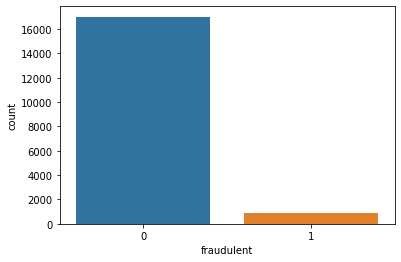

In [189]:
sns.countplot(x="fraudulent",data=dataset_train)

<Axes: xlabel='has_company_logo', ylabel='Density'>

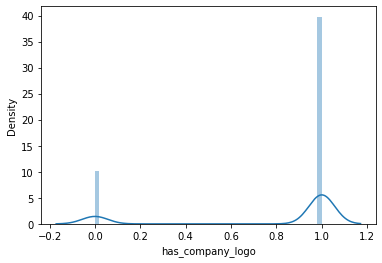

In [190]:
sns.distplot(dataset_train['has_company_logo']) 

<Axes: >

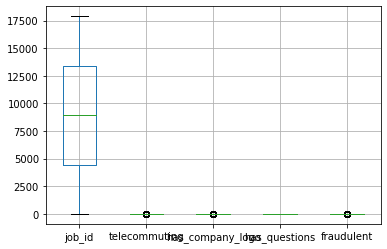

In [191]:
# box plot fr checking outliers
dataset_train.boxplot()

Filling of null values

In [192]:
cat=['title', 'location', 'department', 'salary_range',
       'company_profile', 'requirements', 'benefits',
        'employment_type', 'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']
 

In [193]:
num = [col for col in dataset_train.columns if col not in cat]
num

['job_id', 'description', 'telecommuting', 'has_company_logo', 'has_questions']

In [194]:
cat1=np.array(['title', 'location', 'department', 'salary_range',
       'company_profile', 'requirements', 'benefits',
        'employment_type', 'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'])
for cat in cat1:
    dataset_train[cat] =  dataset_train[cat].fillna(dataset_train[cat].mode()[0])
    

In [195]:
num=(['telecommuting', 'has_company_logo', 'has_questions'])
for num_col in num:
    dataset_train[num_col]=dataset_train[num_col].fillna(dataset_train[num_col].median())

In [196]:
dataset_train.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            1
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

converting categorical to numerical values

In [197]:
# Create dummy variables for the 'employment_type' and 'required_experience' columns
dummy_cols = ['employment_type', 'required_experience','required_education']
dummy_df = pd.get_dummies(dataset_train[dummy_cols], prefix=dummy_cols)

# Add the dummy variables back to the original dataset
dataset_train = pd.concat([dataset_train, dummy_df], axis=1)

# Drop the original categorical columns
dataset_train.drop(dummy_cols, axis=1, inplace=True)


In [198]:
dataset_train.shape

(17880, 40)

Feature Engineering(Feature Selection)

In [199]:
dataset_train.drop(['job_id', 'title', 'department',
       'company_profile', 'description', 'benefits','function','location','industry','requirements','salary_range'],axis=1,inplace=True)

In [200]:
dataset_train=pd.concat([dataset_train],axis=1)

In [201]:
dataset_train.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
dataset_train.dtypes

telecommuting                                           int64
has_company_logo                                        int64
has_questions                                           int64
fraudulent                                              int64
employment_type_Contract                                uint8
employment_type_Full-time                               uint8
employment_type_Other                                   uint8
employment_type_Part-time                               uint8
employment_type_Temporary                               uint8
required_experience_Associate                           uint8
required_experience_Director                            uint8
required_experience_Entry level                         uint8
required_experience_Executive                           uint8
required_experience_Internship                          uint8
required_experience_Mid-Senior level                    uint8
required_experience_Not Applicable                      uint8
required

In [203]:
# Separate the target variable from the input features
y = dataset_train['fraudulent']
X = dataset_train.drop('fraudulent', axis=1) #axis=1 the operation is performed along the columns

In [204]:
# Split the data into training and test sets
train_size = int(len(dataset_train) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 12516
test data: 5364


    len(dataset_train) calculates the number of rows in the DataFrame, which is 0.7 represents the percentage of data that we want to include in the training set, which is 70%.

    len(dataset_train) * 0.7 calculates the number of rows that we want to include in the training set, which is 70% of 100, or 70 rows.

    int() converts the result to an integer, which is necessary because we cannot have a fractional number of rows in the training set.

    train_size is assigned the value of 70, which represents the number of rows that should be included in the training set.

In [205]:
X_train.head()

,telecommuting,has_company_logo,has_questions,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,required_experience_Director,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
X_train.columns

Index(['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'required_experience_Associate',
       'required_experience_Director', 'required_experience_Entry level',
       'required_experience_Executive', 'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable',
       'required_education_Associate Degree',
       'required_education_Bachelor's Degree',
       'required_education_Certification', 'required_education_Doctorate',
       'required_education_High School or equivalent',
       'required_education_Master's Degree', 'required_education_Professional',
       'required_education_Some College Coursework Completed',
       'required_education_Some High School Coursework',
       'required_education_Unspecified', 'required_education_Vocational',
       '

In [207]:
X_train.dtypes

telecommuting                                           int64
has_company_logo                                        int64
has_questions                                           int64
employment_type_Contract                                uint8
employment_type_Full-time                               uint8
employment_type_Other                                   uint8
employment_type_Part-time                               uint8
employment_type_Temporary                               uint8
required_experience_Associate                           uint8
required_experience_Director                            uint8
required_experience_Entry level                         uint8
required_experience_Executive                           uint8
required_experience_Internship                          uint8
required_experience_Mid-Senior level                    uint8
required_experience_Not Applicable                      uint8
required_education_Associate Degree                     uint8
required

Standardization of Data(By standardizing the numerical features in the training set, we are ensuring that each feature has the same scale and is centered around 0. )

In [208]:

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


The __init__ method initializes the class instance and sets the mean and standard deviation attributes to None.

The fit method takes in a dataset X and computes the mean and standard deviation of each feature in the dataset. These values are stored in the self.mean_ and self.std_ attributes.

The transform method takes in a dataset X and applies the standardization formula to each feature using the mean and standard deviation values stored in self.mean_ and self.std_. The resulting standardized dataset is returned.

The fit_transform method combines the fit and transform methods into a single method that first computes the mean and standard deviation of the dataset and then standardizes the dataset using those values. The standardized dataset is returned.

In [209]:
num_ = [('telecommuting', 'has_company_logo', 'has_questions')]
x_train_num = dataset_train[num]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(x_train_num)

# Scale the numerical features in the training set
dataset_train[num] = scaler.transform(x_train_num)




the num_cols list contains the names of four numerical columns in the dataset_train DataFrame: 'Age', 'Fare', 'SibSp', and 'Parch'.

The next line creates a new DataFrame x_train_num containing only these columns from dataset_train.

A StandardScaler instance is then created, and the fit method is called on x_train_num to compute the mean and standard deviation of each feature.

Finally, the transform method is called on x_train_num to scale the data using the mean and standard deviation computed in the previous step. The scaled data is then assigned back to the corresponding columns in the dataset_train DataFrame.

In [210]:
X_train.shape

(12516, 28)

In [211]:
X_test.shape

(5364, 28)

In [212]:
y_train.shape 

(12516,)

In [213]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
12511    0
12512    0
12513    0
12514    0
12515    0
Name: fraudulent, Length: 12516, dtype: int64

In [214]:
X_train.dtypes

telecommuting                                           int64
has_company_logo                                        int64
has_questions                                           int64
employment_type_Contract                                uint8
employment_type_Full-time                               uint8
employment_type_Other                                   uint8
employment_type_Part-time                               uint8
employment_type_Temporary                               uint8
required_experience_Associate                           uint8
required_experience_Director                            uint8
required_experience_Entry level                         uint8
required_experience_Executive                           uint8
required_experience_Internship                          uint8
required_experience_Mid-Senior level                    uint8
required_experience_Not Applicable                      uint8
required_education_Associate Degree                     uint8
required

In [215]:
X_test.dtypes

telecommuting                                           int64
has_company_logo                                        int64
has_questions                                           int64
employment_type_Contract                                uint8
employment_type_Full-time                               uint8
employment_type_Other                                   uint8
employment_type_Part-time                               uint8
employment_type_Temporary                               uint8
required_experience_Associate                           uint8
required_experience_Director                            uint8
required_experience_Entry level                         uint8
required_experience_Executive                           uint8
required_experience_Internship                          uint8
required_experience_Mid-Senior level                    uint8
required_experience_Not Applicable                      uint8
required_education_Associate Degree                     uint8
required

In [216]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()


The first function sigmoid(x) implements the sigmoid activation function. It takes a numerical value x as input and returns the result of the sigmoid function applied to x. 
The second function binary_cross_entropy(y_true, y_pred) computes the binary cross-entropy loss between the true labels y_true and the predicted labels y_pred. This loss function is commonly used in binary classification problems, where there are only two possible classes. The function first calculates the loss for each individual sample, and then takes the mean of the losses across all samples. The formula for binary cross-entropy loss is:

    y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)

In [217]:
class NeuralNetwork:
    def __init__(self, num_features):
        self.weights1 = np.random.rand(10, num_features)
        self.weights2 = np.random.rand(1, 10)
  

    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1.T))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2.T))
        return self.output_layer
    
    def train(self, X_train, y_train, lr, epochs):
        y_train = y_train.values.reshape(-1, 1)  # convert to numpy array and reshape
        for i in range(epochs):
            # forward propagation
            output = self.forward(X_train)

            # calculate error
            error = y_train - output

            # backpropagation
            output_derivative = output * (1 - output)
            hidden_layer_derivative = self.hidden_layer * (1 - self.hidden_layer)
            delta2 = error * output_derivative
            delta1 = np.dot(delta2, self.weights2) * hidden_layer_derivative

            # update weights
            self.weights2 += lr * np.dot(delta2.T, self.hidden_layer)
            self.weights1 += lr * np.dot(delta1.T, X_train)



 a class called NeuralNetwork which implements a simple feedforward neural network with one hidden layer. The __init__ method initializes the weights randomly for both layers.

Here is a brief explanation of the __init__ method:

    __init__(self, num_features): This method initializes the weights for both layers randomly using the numpy rand function. num_features is the number of input features. The weights are randomly initialized to small values to break the symmetry of the network and avoid getting stuck in local minima during training. The first layer (weights1) has 6 neurons, and the second layer (weights2) has 1 neuron, which is appropriate for a binary classification problem where we want to predict a binary label (0 or 1) based on the input features.

forward(self, X): This method takes an input X and computes the output of the neural network. It first applies the weights of the first layer (weights1) to the input and passes the result through the sigmoid activation function to compute the output of the hidden layer. The sigmoid function ensures that the output of the hidden layer is between 0 and 1, which is appropriate for a binary classification problem. Then, it applies the weights of the second layer (weights2) to the output of the hidden layer and passes the result through the sigmoid activation function again to compute the final output of the neural network. The output of the neural network is also between 0 and 1, which represents the predicted probability of the positive class. Finally, the method returns the output of the neural network.

In [218]:
nn = NeuralNetwork(num_features= 28)
nn.train(X_train, y_train, lr=0.01, epochs=1200)

In [219]:
# make predictions on test data
y_pred = nn.forward(X_test)

# convert predictions to binary (0 or 1) using a threshold value of 0.5
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# compare predictions to actual labels and calculate accuracy
accuracy = np.mean(y_pred_binary == y_test.values.reshape(-1, 1))
print('Test accuracy:', accuracy)


Test accuracy: 0.9343773303504848


In [220]:
# assume X_test and y_test are the test dataset and labels
# predict labels using trained model
y_pred = nn.forward(X_test)
y_pred_classes = np.round(y_pred)

# create confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    true_label = int(y_test.iloc[i])
    predicted_label = int(y_pred_classes[i][0])
    confusion_matrix[true_label][predicted_label] += 1

# print confusion matrix
print("Confusion matrix:")
print(confusion_matrix)


Confusion matrix:
[[5006.    0.]
 [ 352.    6.]]


In [ ]:
import itertools

# define hyperparameters and their possible values to try out
learning_rates = [0.1, 0.01, 0.001]
epochs = [1000,2000,3000]
hidden_layer_sizes = [40, 45, 30]

# create a list of all possible hyperparameter combinations
hyperparameter_combinations = list(itertools.product(learning_rates, epochs, hidden_layer_sizes))

# initialize variables to keep track of best hyperparameters and best accuracy
best_hyperparameters = None
best_accuracy = 0

# loop over all possible hyperparameter combinations
for lr, epoch, hidden_layer_size in hyperparameter_combinations:
    # train model with current hyperparameters
    nn = NeuralNetwork(num_features=28)
    nn.train(X_train, y_train, lr=lr, epochs=epoch)
    
    # make predictions on test data
    y_pred = nn.forward(X_test)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

    # calculate accuracy
    accuracy = np.mean(y_pred_binary == y_test.values.reshape(-1, 1))

    # if current accuracy is better than previous best, update best hyperparameters and best accuracy
    if accuracy > best_accuracy:
        best_hyperparameters = (lr, epoch, hidden_layer_size)
        best_accuracy = accuracy
    
print("Best hyperparameters:", best_hyperparameters)
print("Best test accuracy:", best_accuracy)


In [224]:
class NeuralNetwork:
    def __init__(self, num_features):
        self.weights1 = np.random.rand(20, num_features)
        self.weights2 = np.random.rand(1, 20)
  

    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1.T))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2.T))
        return self.output_layer
    
    def train(self, X_train, y_train, lr, epochs):
        y_train = y_train.values.reshape(-1, 1)  # convert to numpy array and reshape
        for i in range(epochs):
            # forward propagation
            output = self.forward(X_train)

            # calculate error
            error = y_train - output

            # backpropagation
            output_derivative = output * (1 - output)
            hidden_layer_derivative = self.hidden_layer * (1 - self.hidden_layer)
            delta2 = error * output_derivative
            delta1 = np.dot(delta2, self.weights2) * hidden_layer_derivative

            # update weights
            self.weights2 += lr * np.dot(delta2.T, self.hidden_layer)
            self.weights1 += lr * np.dot(delta1.T, X_train)



In [225]:
# train model with best hyperparameters
best_lr, best_epochs, best_hidden_layer_size = best_hyperparameters
nn = NeuralNetwork(num_features=28)
nn.train(X_train, y_train, lr=best_lr, epochs=best_epochs)

# make predictions on test data
y_pred = nn.forward(X_test)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# calculate accuracy
accuracy = np.mean(y_pred_binary == y_test.values.reshape(-1, 1))
print("Test accuracy with best hyperparameters:", accuracy)


Test accuracy with best hyperparameters: 0.9343773303504848
